In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [119]:
df=pd.read_csv('trainms.csv')
df.head()

,s.no,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Data fields
These are the different attributes present in the dataset with a description of what they each mean

* **id** - a unique identifier for each trip
* **vendor_id** - a code indicating the provider associated with the trip record
* **pickup_datetime** - date and time when the meter was engaged
* **dropoff_datetime** - date and time when the meter was disengaged
* **passenger_count** - the number of passengers in the vehicle (driver entered value)
* **pickup_longitude** - the longitude where the meter was engaged
* **pickup_latitude** - the latitude where the meter was engaged
* **dropoff_longitude** - the longitude where the meter was disengaged
* **dropoff_latitude** - the latitude where the meter was disengaged
* **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* **trip_duration** - duration of the trip in seconds

In [120]:
df.isnull().sum()

s.no                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        400
self_employed                 18
family_history                 0
treatment                      0
work_interfere               226
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     873
dtype: int64

In [121]:
print(df.shape[0])

1000


### Looking for missing values
Now we will look at how complete our data is and if we are dealing with any missing data

As we can see above we have a few missing values, and there are two major ways of dealing with this
* **Removing the rows with missing values** : If the number of rows containing missing data is much smaller than the overall dataset size, we can just remove the rows with missing values

* **Filling missing values** : We can also fill in the missing values with values derived from the rest of the data. Eg: Replace every missing value with the mean of that column

In [116]:
print("Old Dataset length :",df.shape[0])
df=df.dropna(axis=0)

Old Dataset length : 1000


In [122]:
print("New Dataset length :",df.shape[0])

New Dataset length : 1000


### Lets remove some pesky data
So now that our data is almost cleaned, let's go ahead and shoot a few of the unnecessary columns out of the dataset. Ask the instructor for what these poor columns did to deserve this horrible fate

P.S : They were just being too difficult to deal with for now

In [123]:
df=df.drop(['comments','Country','state','work_interfere'],axis=1)
df.head()

,s.no,Timestamp,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,2014-08-27 11:29:31,37,Female,NaN,No,Yes,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2,2014-08-27 11:29:37,44,M,NaN,No,No,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,3,2014-08-27 11:29:44,32,Male,NaN,No,No,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,4,2014-08-27 11:29:46,31,Male,NaN,Yes,Yes,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,5,2014-08-27 11:30:22,31,Male,NaN,No,No,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [124]:
df = df.replace(['Male','male','m','M'],1)
df = df.replace(['Female','female','f','F'],0)
df = df.replace(['Yes','yes','y'],1)
df = df.replace(['No','no','n'],0)
df.head()

,s.no,Timestamp,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1,2014-08-27 11:29:31,37,0,NaN,0,1,6-25,0,1,...,1,Somewhat easy,0,0,Some of them,1,0,Maybe,1,0
1,2,2014-08-27 11:29:37,44,1,NaN,0,0,More than 1000,0,0,...,Don't know,Don't know,Maybe,0,0,0,0,0,Don't know,0
2,3,2014-08-27 11:29:44,32,1,NaN,0,0,6-25,0,1,...,Don't know,Somewhat difficult,0,0,1,1,1,1,0,0
3,4,2014-08-27 11:29:46,31,1,NaN,1,1,26-100,0,1,...,0,Somewhat difficult,1,1,Some of them,0,Maybe,Maybe,0,1
4,5,2014-08-27 11:30:22,31,1,NaN,0,0,100-500,1,1,...,Don't know,Don't know,0,0,Some of them,1,1,1,Don't know,0


In [128]:
training = pd.get_dummies(df,columns=["Gender"])
training

,s.no,Timestamp,Age,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,Gender_cis male,Gender_cis-female/femme,Gender_fluid,Gender_maile,Gender_male leaning androgynous,Gender_msle,Gender_non-binary,Gender_queer,Gender_something kinda male?,Gender_woman
0,1,2014-08-27 11:29:31,37,NaN,0,1,6-25,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,2014-08-27 11:29:37,44,NaN,0,0,More than 1000,0,0,Don't know,...,0,0,0,0,0,0,0,0,0,0
2,3,2014-08-27 11:29:44,32,NaN,0,0,6-25,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2014-08-27 11:29:46,31,NaN,1,1,26-100,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2014-08-27 11:30:22,31,NaN,0,0,100-500,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,6,2014-08-27 11:31:22,33,NaN,1,0,6-25,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,7,2014-08-27 11:31:50,35,NaN,1,1,1-5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7,8,2014-08-27 11:32:05,39,NaN,0,0,1-5,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,2014-08-27 11:32:39,42,NaN,1,1,100-500,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,10,2014-08-27 11:32:43,23,NaN,0,0,26-100,0,1,Don't know,...,0,0,0,0,0,0,0,0,0,0


### Let's get on with the machine learning already! Splitting the data

Ok I hear you, it's a machine learning workshop, but just one more step and then we'll do some machine learning. 

Now we'll split our data into training and testing samples. We'll use the testing data to understand how well our model is performing.

As per common practices we'll split our data into a 80:20 ratio.
This means that 80% of our data will be used for training and 20% for testing


In [108]:
from sklearn.model_selection import train_test_split
labels=df['treatment']
df_train=df.drop(['treatment'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(df_train,labels,test_size=0.1)

In [109]:
x_train.head()

,s.no,Timestamp,Age,Gender,self_employed,family_history,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
334,335,2014-08-27 14:37:35,29,m,No,No,6-25,Yes,No,No,...,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,Maybe,Maybe,No,No
347,348,2014-08-27 14:45:45,54,M,No,Yes,More than 1000,No,Yes,Don't know,...,Don't know,Don't know,No,No,No,Yes,No,No,Don't know,No
543,544,2014-08-27 18:12:55,28,female,No,Yes,100-500,Yes,Yes,Yes,...,Don't know,Don't know,Yes,Yes,Some of them,Some of them,No,No,No,Yes
17,18,2014-08-27 11:34:37,32,Male,NaN,No,6-25,No,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,No,No,No
566,567,2014-08-27 19:38:44,39,Male,No,No,500-1000,No,Yes,Yes,...,Yes,Don't know,Yes,Maybe,Yes,Yes,No,Maybe,Don't know,No


In [110]:
print("Training data length:",x_train.shape[0])
print("Testing data length:",x_test.shape[0])

Training data length: 900
Testing data length: 100


### Finally the moment you've been waiting for ....
Now let's get on to building a simple linear regression model.
All we'll try to do is fit a straight line through our data and then predict new values

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(x_train,y_train)

ValueError: could not convert string to float: '2014-08-27 14:37:35'

### Now we check how good our model actually is
We do this by using the testing data that we had initially set aside. We predict the expected time of the taxi ride for those data values and then compare against what the actual duration of the ride was

In [44]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

Mean Squared Error (MSE) of the model is : 9767072.371793807
Root Mean Squared Error (RMSE) of the model is : 3125.2315709069953


### Time for some feature engineering

Feature engineering is the task of gaining more insights from your data and creating features that would help your model perform better. 

In this dataset let's add the difference of longitudes and latitudes so that we get a relative distance measure. We can also add in attributes for the time of day, which day of the week as well as which day of the year the taxi ride occurs

In [46]:
df=pd.read_csv('train_2.csv')
df=df.dropna(axis=0)

### Using the timestamp information
We will infer a variety of new data from the given timestamps, such as the which day of the week it is ( We all know the horrible monday morning traffic), the hour of the day and which day of the year 

In [47]:
df.pickup_datetime=pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime=pd.to_datetime(df.dropoff_datetime)
df['hour'] = df.pickup_datetime.dt.hour
df['year'] = df.pickup_datetime.dt.year
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455,17,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663,0,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429,19,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435,13,2016


### Adding geospatial information

Sounds pretty fancy right? well it's just information about the difference between the longitudes and latitudes of the pickup and dropoff location

In [50]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [52]:
df['distance_miles'] = distance(df.pickup_latitude, df.pickup_longitude, \
                                     df.dropoff_latitude, df.dropoff_longitude)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,hour,year,distance_miles
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455,17,2016,0.931138
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663,0,2016,1.121890
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,2016,3.967516
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429,19,2016,0.923046
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435,13,2016,0.738555


### Some quick cleanup
We remove all the old features that we had used to generate new ones, they are redundant now

In [53]:
df=df[['passenger_count','trip_duration','hour','year','distance_miles']]

In [54]:
labels=df['trip_duration']
df_train=df.drop(['trip_duration'],axis=1)

### Back to the magic of machine learning

We use the same code as above for training and testing our new and hopefully imrpoved model

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_train,labels,test_size=0.2)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

Mean Squared Error (MSE) of the model is : 9156468.359953899
Root Mean Squared Error (RMSE) of the model is : 3025.9656904786443


In [79]:
model.score(x_test,y_test)

0.02192044045629116

### That sure is an improvement! 
See our magical feature engineering worked! We have improved our model by just applying simple intuition

### Now we're going to try see how data transforms work
For this I am going to plot the distribution of the different attributes in the dataset

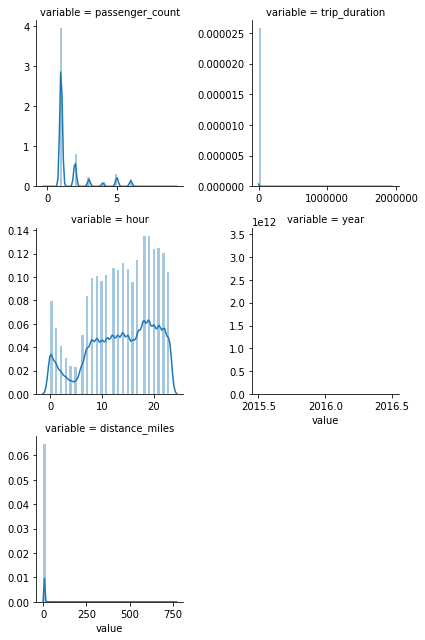

In [76]:
f = pd.melt(df)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

As we can clearly observe that the data is mostly skewed, this could be because an attribute has most of it's values in a small range. Or it could be beacuse of outliers. We will use log transforms to get reduce the skewness

In [84]:
def log_transform(feature):
    df[feature] = np.log1p(df[feature].values)

In [85]:
log_transform('trip_duration')
log_transform('passenger_count')
log_transform('distance_miles')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


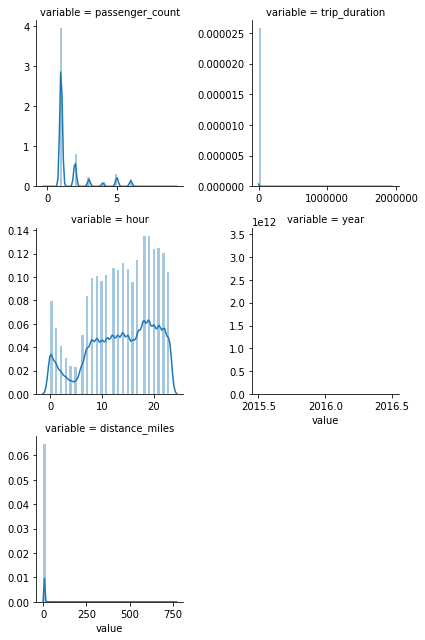

In [77]:
f = pd.melt(df)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [91]:
labels=df['trip_duration']
df_train=df.drop(['trip_duration'],axis=1)

In [92]:
x_train,x_test,y_train,y_test=train_test_split(df_train,labels,test_size=0.2)

In [93]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

Mean Squared Error (MSE) of the model is : 0.005730765705151907
Root Mean Squared Error (RMSE) of the model is : 0.07570182101608855


In [105]:
model.score(x_test,y_test)

0.5502837576057698

### So that was a huge leap.....
As we saw using log transforms helped us get a huge boost in how well the model fits. This is mainly because the data is now moved towards normality and the outlier influence on the model is greatly reduced

### Let's try a few more advanced forms of regression

Starting with a decision tree regression model. A decision tree is just a simple structure with each of the nodes of the tree an attribute, and the leaves are the target variable. 

In [106]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(max_depth=2,min_samples_leaf=5, min_samples_split= 5,max_leaf_nodes=10)  
regressor.fit(x_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [107]:
predictions=regressor.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

Mean Squared Error (MSE) of the model is : 0.005637467595170957
Root Mean Squared Error (RMSE) of the model is : 0.07508307129553876


In [108]:
regressor.score(x_test,y_test)

0.5576052356772596

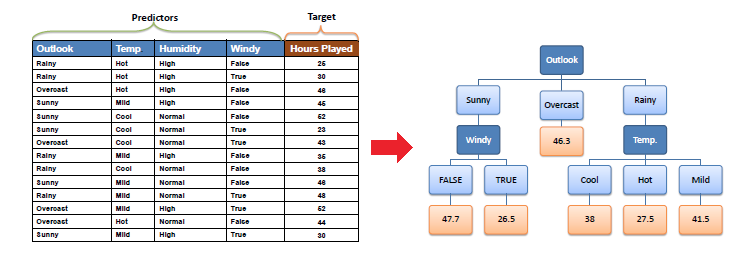

### Let's try some regularization now

Regularization helps us avoid overfitting, so it helps us generalize better and therefore improve the quality of the model.

In [92]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model=Ridge()
model.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [93]:
predictions=model.predict(x_test)
error=mean_squared_error(y_test,predictions)
print("Mean Squared Error (MSE) of the model is :",error)
print("Root Mean Squared Error (RMSE) of the model is :",math.sqrt(error))

Mean Squared Error (MSE) of the model is : 0.28531993931867605
Root Mean Squared Error (RMSE) of the model is : 0.5341534791786683


In [94]:
model.score(x_test,y_test)

0.5531549823884235